## Data Exploration/Analysis

Ultimate goal is to predict median sale price per square foot of a house in the neighborhood.

Current step: EDA

Next step: PCA and Clustering. See what patterns emerge in the clusters.

Final step: predict median sale price per square foot.

## Observations:

Multifamily is usually listed with a 'Land Area' of 0.

Condos/apartments, no matter how tall their building, are listed with a height of 1 :/

Really need to start dropping extraneous columns, especially 'assessment' and 'appraisal' values and redundant columns.

From what I can tell, all areas near downtown (east, north and west) are gentrifying. The South side was already middle-class.

## Zones for reference:

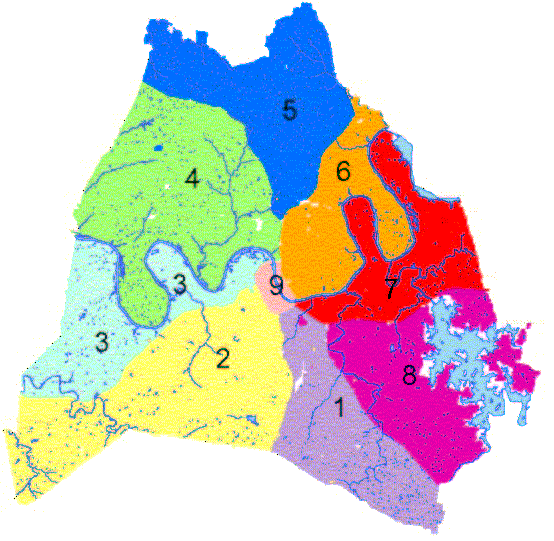

## Neighborhoods (arbitrary/unofficial):

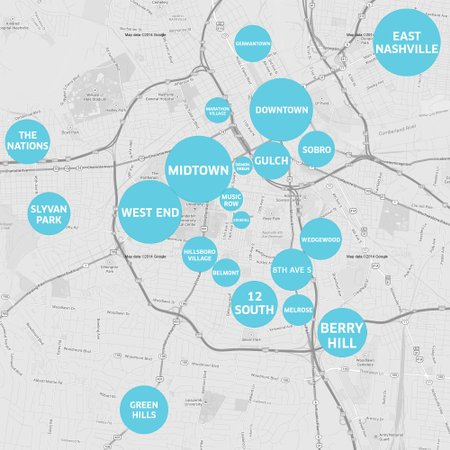

## Motivation

Nashville is one of the nation's fastest-growing metro areas, often hailed as a 'superstar' city with exemplary economic development that other cities strive for. 

https://www.reuters.com/article/us-usa-economy-nashville-insight/as-u-s-superstar-cities-thrive-weaker-ones-get-left-behind-idUSKCN1UE13B

https://www.governing.com/gov-data/nashville-gentrification-maps-demographic-data.html



In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [34]:
df=pd.read_csv('nashville_20190813150235.csv')

C:\Users\alehe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
#DO NOT RUN THIS TWICE IT CONTAINS A MERGE
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df['PPS']=df['Sale Price']/df['Square Footage Improved']
df.PPS=df.PPS.replace(np.inf, np.nan)
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)

In [36]:
import jsoncleaner
df['Assessment Improvement'] = jsoncleaner.dolcomma(df['Assessment Improvement'])
df['Assessment Land'] = jsoncleaner.dolcomma(df['Assessment Land'])
#Neighborhood and Zone are numbers, but categorical.
df['Neighborhood'] = df['Neighborhood'].map(lambda x: str(x) if pd.notnull(x) else None)
df['Zone'] = df['Zone'].map(lambda x: str(x) if pd.notnull(x) else None)

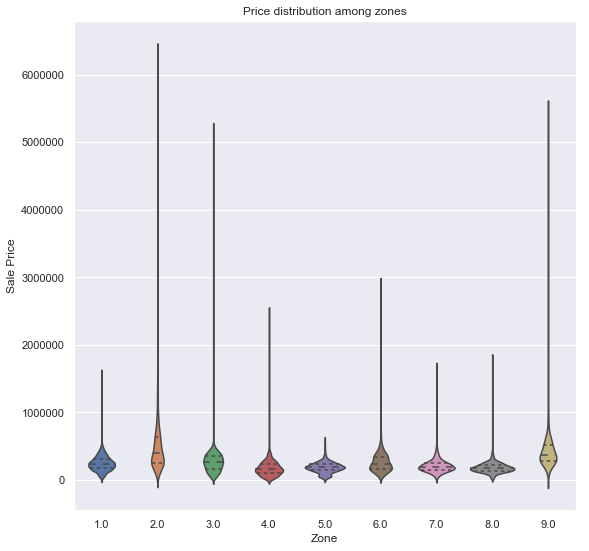

In [37]:
#Showing the price distribution among different zones, but we could use this style graph for any kind of feature.
plt.figure(figsize=(9,9))
sns.violinplot(x="Zone", y="Sale Price", data=df, inner='quartile')
plt.title("Price distribution among zones")
plt.show()
#Zone 9, the downtown, shows the highest sale prices

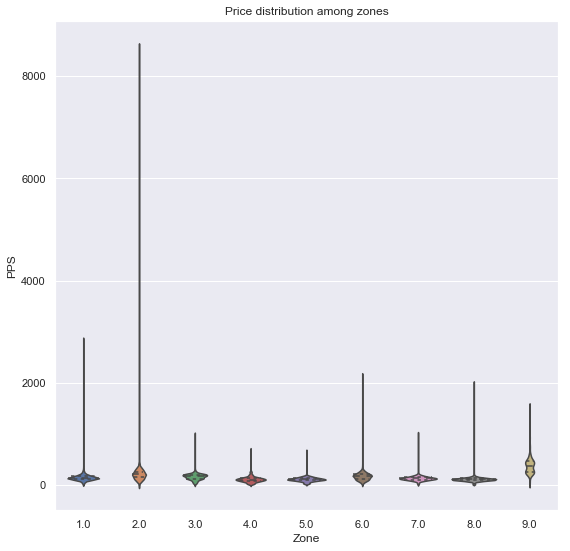

In [38]:
plt.figure(figsize=(9,9))
sns.violinplot(x="Zone", y="PPS", data=df, inner='quartile')
plt.title("Price distribution among zones")
plt.show()

In [7]:
df['Land Value Improved'].head(10)
#Adjacent parcels will often all have the same appraised land value. Appraised values are not generally useful for our purposes.

705    80000.0
707    80000.0
710    80000.0
711    80000.0
764    83200.0
781    65000.0
785    65000.0
791    65000.0
793    73700.0
794    73700.0
Name: Land Value Improved, dtype: float64

In [41]:
df.nlargest(20,'PPS')[['Neighborhood', 'Zone']]
#Lots of observations in neighborhood 9026, all are in Zone 2

,Neighborhood,Zone
129549,9026.0,2.0
154270,9527.0,2.0
130166,9026.0,2.0
129628,9026.0,2.0
170000,9026.0,2.0
148218,9026.0,2.0
129523,9026.0,2.0
134682,3727.0,2.0
153959,9527.0,2.0
129522,9026.0,2.0


In [ ]:
#Many neighborhoods only have 1 or 2 observations. We need to delete neighborhoods with 3 or less observations.
df['Neighborhood'].value_counts()
#.gt() = 'greater than'
s=df.Neighborhood.value_counts().gt(3)
df.loc[df.Neighborhood.isin(s[s].index)].shape
#Removes 124 observations from original dataframe.

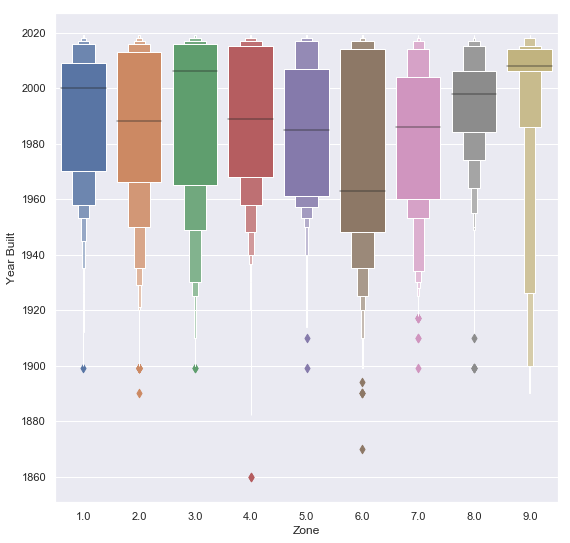

In [42]:
plt.figure(figsize=(9,9))
sns.boxenplot(x="Zone", y="Year Built", data=df)

#Zone 6 is showing the broadest range of values. Perhaps it experienced gentrification at times in the past.
 

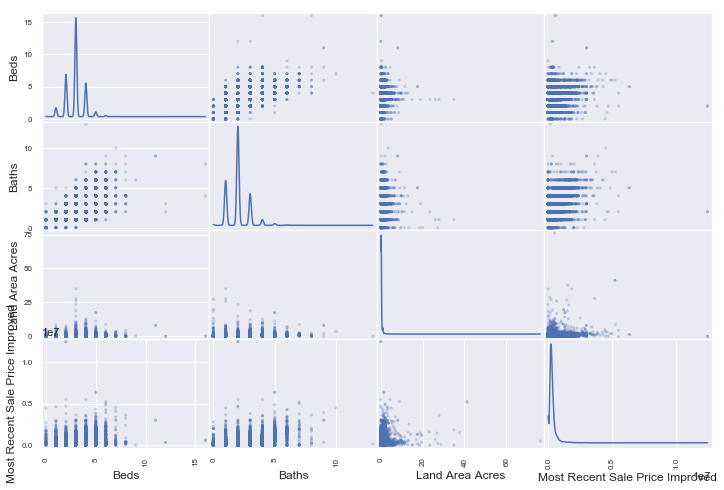

In [43]:
pd.plotting.scatter_matrix(df[['Beds','Baths', 'Land Area Acres','Most Recent Sale Price Improved']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');

1.00    30617
2.00    23929
1.50     4346
1.75     2716
3.00     1629
1.25      440
2.50      147
2.25       87
2.75       59
4.00       12
Name: Story Height, dtype: int64


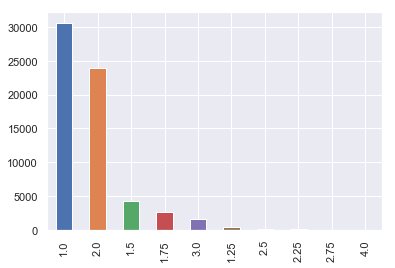

In [45]:
print(df['Story Height'].value_counts())
df['Story Height'].value_counts().plot('bar')

In [46]:
len(df['Neighborhood'].unique())
#This will be getting pretty granular. We should consider trends among Zones as well.

819

2.0    16270
1.0    12720
6.0    11702
8.0     8823
7.0     7026
3.0     4796
9.0     2335
4.0     1745
5.0     1483
Name: Zone, dtype: int64


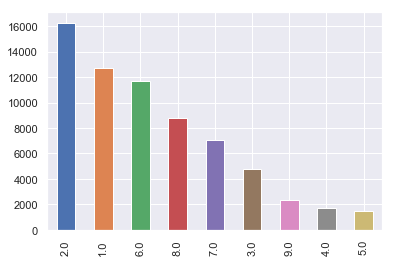

In [47]:
df.Zone.value_counts().plot('bar')
print(df.Zone.value_counts())

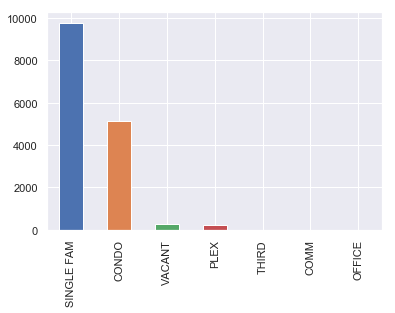

In [54]:
dfz2=df[df.Zone=='2.0']

dfz2['Building Type Custom'].value_counts().plot('bar')

#len(dfz2)

CONDO         2000
SINGLE FAM     241
PLEX            13
OFFICE           6
VACANT           5
COMM             2
THIRD            1
Name: Building Type Custom, dtype: int64


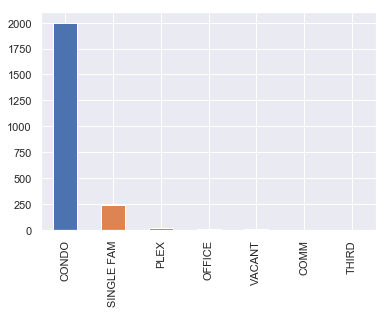

In [56]:
dfz9=df[df.Zone=='9.0']

dfz9['Building Type Custom'].value_counts().plot('bar')

print(dfz9['Building Type Custom'].value_counts())

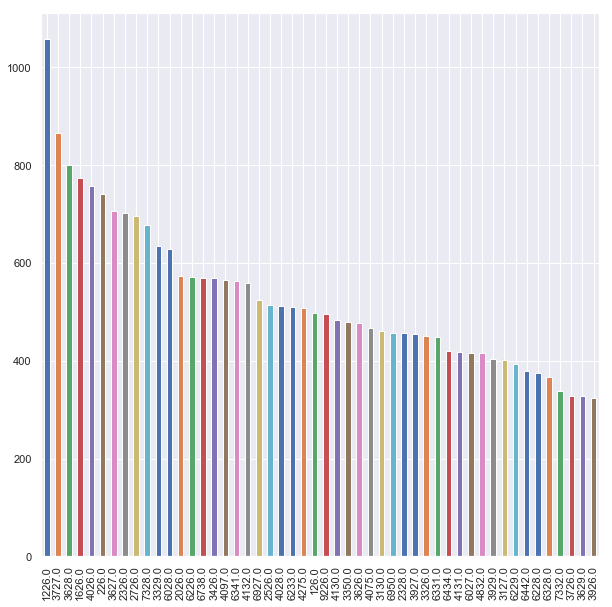

In [24]:
plt.figure(figsize=(10,10))
df.Neighborhood.value_counts()[:50].plot('bar')
plt.show()
#Nice even class distribution

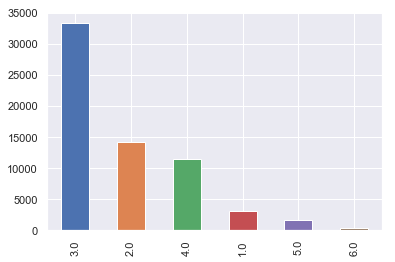

In [22]:
df.Beds.value_counts()[:6].plot('bar')

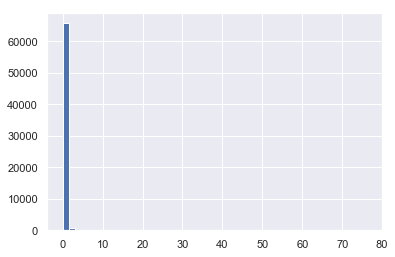

In [23]:
df['Land Area Acres'].hist(bins=50)
#We have some outliers, consider removing
#Important observation: the vsat majority of these units are multifamily (land area of 0)

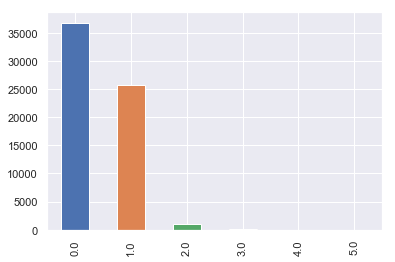

In [21]:
#Add 0.5 to Baths for each "half bath" listed?
#Or not. This is a potential indicator of PPSF
df['Half Bath'].value_counts().plot('bar')

In [20]:
df['Building Condition'].value_counts()
#I think this kind of class imbalance makes it useful for predictive purposes; if anything's different from 'Average' that's significant

Average        62780
Fair             709
Good             269
Poor             109
Very Good         49
Very Poor         34
Dilapidated       21
Excellent         11
Name: Building Condition, dtype: int64

In [19]:
df['Building Grade'].value_counts()
#We cannot use this variable. There is no guide on the Davidson CO site as to what these indicate.
#It is also safe to assume that, if you're a developer, you'll construct your new building in Grade A condition.

C      41733
B      16256
D       2528
A       2168
X       1121
E        112
TCC       14
SRB       12
SRC        8
OFB        6
OFD        3
AAC        2
ALB        2
OFC        2
TCD        2
IDC        2
TCB        2
SSD        2
TFC        1
SMD        1
SSC        1
ACB        1
IDD        1
ODB        1
SSB        1
Name: Building Grade, dtype: int64

In [18]:
print(df['Building Type Custom'].value_counts())

SINGLE FAM    45194
CONDO         16062
VACANT         1409
PLEX           1256
COMM             28
THIRD            19
OFFICE           11
INDUSTRIAL        3
Name: Building Type Custom, dtype: int64


In [72]:
dfn9527=df[df['Neighborhood'] == '9527.0']

dfn9527.head()

,Unnamed: 0,Assessment Classification*,Assessment Improvement,Assessment Land,Assessment Total,Assessment Year,Baths,Beds,Building Condition,Building Grade,...,Land Value Improved,Assessment Land Improved,Total Appraisal Value Improved,Square Footage Improved,Building Type Custom,Land Area Acres,PPS,NeighborhoodPPS,Assessment Ratio,NeighborhoodAR
137672,137672,RES,127825.0,89975.0,"$217,800",2019,4.0,4.0,Average,A,...,359900.0,89975.0,871200.0,4075.0,SINGLE FAM,2.44,209.815951,1022.535126,0.586892,0.541148
153699,153699,RES,0.0,8125.0,"$8,125",2019,NaN,NaN,NaN,NaN,...,32500.0,8125.0,32500.0,0.0,NaN,1.29,NaN,1022.535126,0.000000,0.541148
153719,153719,RES,230275.0,133750.0,"$364,025",2019,5.0,4.0,Good,X,...,535000.0,133750.0,1456100.0,4239.0,SINGLE FAM,1.59,294.880868,1022.535126,0.632580,0.541148
153730,153730,RES,169825.0,142475.0,"$312,300",2019,1.0,2.0,Fair,D,...,569900.0,142475.0,1249200.0,832.0,SINGLE FAM,2.41,1442.307692,1022.535126,0.543788,0.541148
153959,153959,RES,206025.0,255875.0,"$461,900",2019,1.0,1.0,Average,C,...,1023500.0,255875.0,1847600.0,485.0,SINGLE FAM,4.49,4072.164948,1022.535126,0.446038,0.541148


In [59]:
#Flirting with the idea of Assessment Improvement / Assessment Land ratio as a good predictor of PPS
#Be warned this is only so useful because assessments are done after the property is built and use metrics derived from other data
#However when averaged across the neighborhood it could show promise
#Hypothesis: A neighborhood with low assessment ratio but high population density will get gentrified
#Normalize it
df['Assessment Ratio'] = df['Assessment Improvement'] / (df['Assessment Land'] + df['Assessment Improvement'])

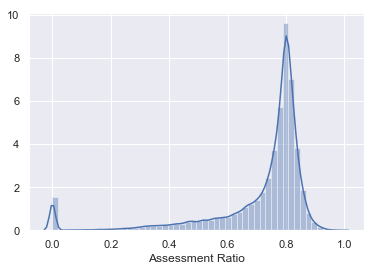

In [62]:
sns.distplot(df['Assessment Ratio'].dropna())

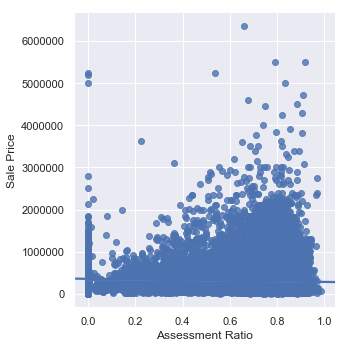

In [65]:
sns.lmplot(x='Assessment Ratio', y = 'Sale Price', data = df)
#Need to clean up data.

In [ ]:
ratioprice= pd.DataFrame(df[['Assessment Ratio', 'Sale Price', 'Year Built']])

ratioprice.corr()
#Almost no correlation whatsoever between ratio and price

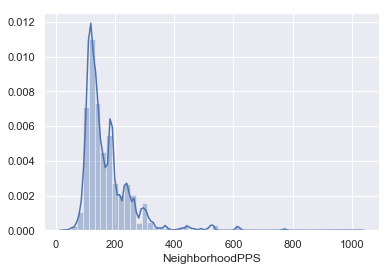

In [67]:
sns.distplot(df.NeighborhoodPPS.dropna())

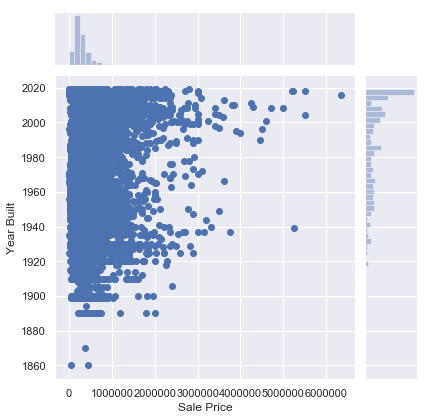

In [69]:
g = sns.jointplot("Sale Price", "Year Built", df)